In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
# setting up training data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [5]:
#creating a model
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])


#input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member.
#units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem

In [6]:
# assemble layers into model
model = tf.keras.Sequential([l0])

In [7]:
# compile model using loss and optimizer function
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [10]:
# train model
history=model.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)
print("Finished training the model")

Finished training the model


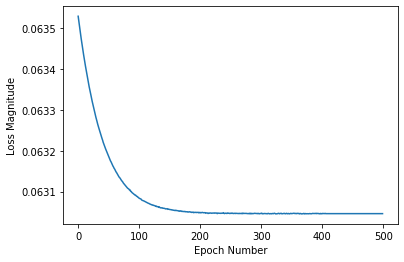

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [13]:
# using model to predict values
print(model.predict([100.0]))

[[211.74744]]


OBSERVATIONS:
The correct answer is  100×1.8+32=212 , so our model is doing really well.

In [15]:
#looking at the layer weights
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7979496]], dtype=float32), array([31.952477], dtype=float32)]


OBSERVATIONS:
The first variable is close to 1.8 and the second to 32. These values 1.8 and 32 are the actual variables in the real conversion formula.